In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [3]:
from scipy import integrate
import warnings

#적분에 관한 warning 을 출력하지 않도록 한다.
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

In [4]:
x_range = np.array([0,1])

In [5]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

In [6]:
X = [x_range, f]

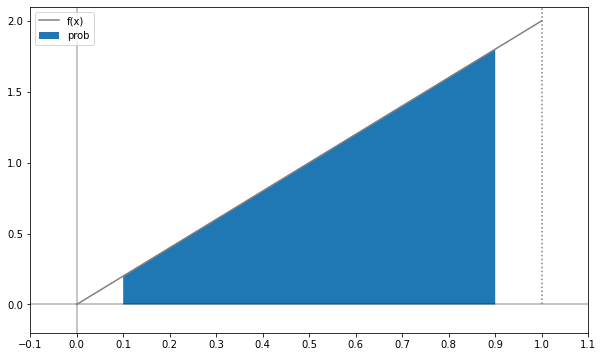

In [7]:
xs = np.linspace(x_range[0], x_range[1], 100)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label= 'f(x)', color = 'gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(),0,2.2, linestyles = ':', color = 'gray')

xs = np.linspace(0.1, 0.9, 10)

ax.fill_between(xs, [f(x) for x in xs], label= 'prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [8]:
integrate.quad(f,0.4,0.6)

(0.200, 0.000)

In [9]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun

0

In [10]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [11]:
def F(x):
    return integrate.quad(f, -np.inf,x)[0]

In [12]:
F(0.6) - F(0.4)

0.200

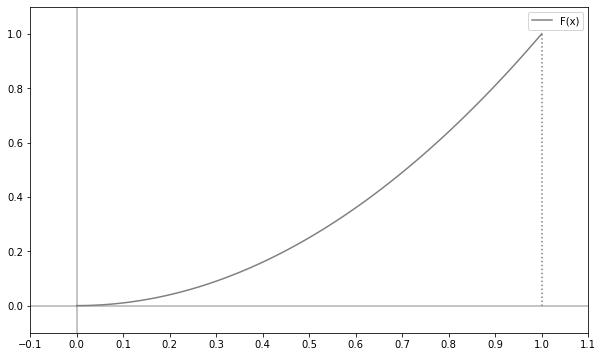

In [13]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label= 'F(x)', color = 'gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(),0,1, linestyles = ':', color = 'gray')


ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [14]:
y_range = [3,5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

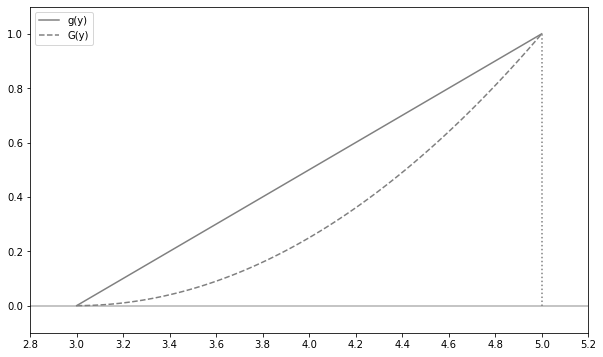

In [15]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label = 'g(y)', color = 'gray')
ax.plot(ys, [G(y) for y in ys], label = 'G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(),0,1, linestyles = ':', color = 'gray')


ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [16]:
def integrand(x):
    return x*f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [17]:
def E(X, g = lambda x : x ):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [18]:
E(X)

0.667

In [19]:
E(X, g = lambda x:2*x+3)

4.333

In [20]:
2 - E(X) + 3

4.333

In [21]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

In [22]:
integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [23]:
def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X,g)
    def integrand(x):
        return (g(x)-mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [24]:
V(X)

0.056

In [25]:
V(X, lambda x:2*x + 3)

0.222

In [26]:
2 ** 2 * V(X)

0.222

In [27]:
def f_xy(x,y):
    if 0 <= y <= 1 and 0 <= x-y <= 1:
        return 4 * y * (x-y)
    else:
        return 0

In [28]:
x_range = [0,2]
y_range = [0,1]

In [31]:
XY = [x_range, y_range, f_xy]

In [32]:
XY

[[0, 2], [0, 1], <function __main__.f_xy(x, y)>]

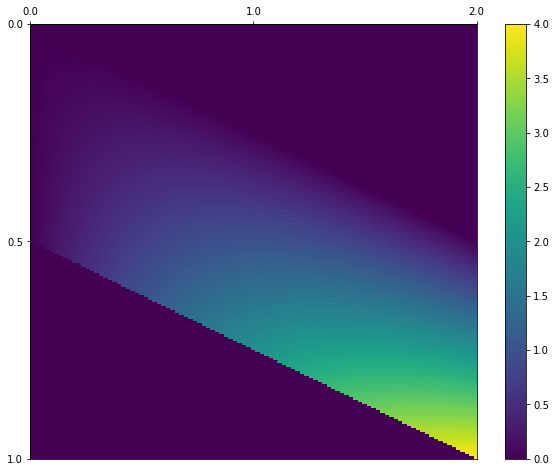

In [33]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)

ax.set_xticks(np.linspace(0,200,3), minor = False)
ax.set_yticks(np.linspace(0,200,3), minor = False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))

ax.invert_yaxis()
ax.xaxis.tick_top()

fig.colorbar(c,ax=ax)

plt.show()

In [34]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), - np.inf, np.inf)[0]

def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), - np.inf, np.inf)[0]

In [35]:
X = [x_range, f_X]
Y = [y_range, f_Y]

Text(0.5, 1.0, 'Y_marginal density function')

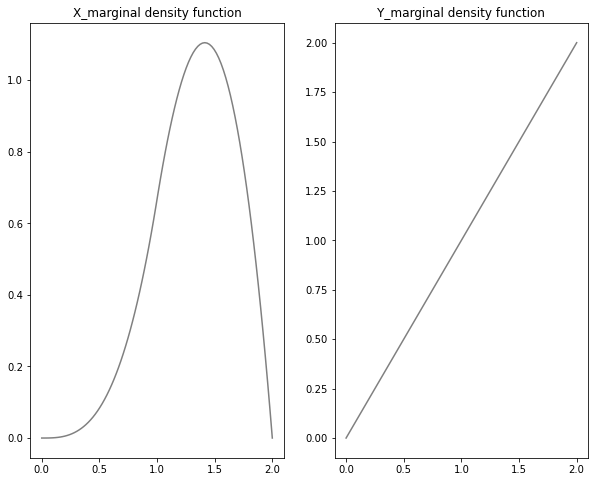

In [36]:
xs = np.linspace(*x_range,100)
ys = np.linspace(*y_range,100)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.plot(xs, [f_X(x) for x in xs], color = 'gray')
ax2.plot(xs, [f_Y(y) for y in ys], color = 'gray')

ax1.set_title("X_marginal density function")
ax2.set_title("Y_marginal density function")


In [37]:
def integrand(x, y):
    return x * f_xy(x,y)

integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

0.863

In [38]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x,y):
        return g(x,y) * f_xy(x,y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

In [39]:
mean_X = E(XY, lambda x,y:x)

In [40]:
mean_X

0.863

In [41]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.000

In [42]:
a, b = 2, 3
E(XY, lambda x,y : a*x + b*y)

4.749

In [43]:
a * mean_X + b*mean_Y

1.727

In [44]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x,y):
        return (g(x,y) - mean)** 2 * f_xy(x,y)
    return integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

In [45]:
var_X = V(XY, lambda x,y:x)

In [46]:
var_X

0.006

In [47]:
var_Y = V(XY, lambda x,y:y)

In [48]:
var_Y

1.689

In [49]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x,y:x)
    mean_Y = E(XY, lambda x, y: y)
    
    def integrand(x,y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x,y)
    return integrate.nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

In [50]:
cov_xy = Cov(XY)
cov_xy

-0.000

In [51]:
V(XY, lambda x,y : a*x - b*y)

0.037

In [52]:
a**2 *  var_X + b**2 * var_Y + 2*a*b * cov_xy

15.223

In [53]:
cov_xy/np.sqrt(var_X * var_Y)

-0.0005592310657045

In [54]:
fb091f18b1c9f0d2dad88df5d374911dc49c0bb8

NameError: name 'fb091f18b1c9f0d2dad88df5d374911dc49c0bb8' is not defined

In [ ]:
import pandas_datareader as pdr

TANGO_API_KEY = 'fb091f18b1c9f0d2dad88df5d374911dc49c0bb8'
df = pdr.get_data_tiingo('GOOG', api_key = TANGO_API_KEY)
df.head()

In [ ]:
df
# import seaborn as sns

# sns.lineplot(x=df.index.levels[1], y='adjClose',data=df)
# df.index.levels[1]

# t1 = df.index.levels[1]
# s = []

# for i in range(len(t1)):
#     s.append(str(t1[i]))
    
# sns.lineplot(x=s, y='adjClose',data=df)

In [ ]:
import pandas_datareader.data as web

df = web.DataReader("^KOSPI",'stooq')
sns.lineplot(x = df.index, y='Close',data=df)


In [ ]:
import pandas_datareader.data as web

ALPHAVANTAGE_API_KEY = 'MGLXZNXLU6IX1UTI'
df_1 = web.DataReader("USD/KRW", 'av-forex',api_key=ALPHAVANTAGE_API_KEY)
df_1.head()